In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regression with NumPy

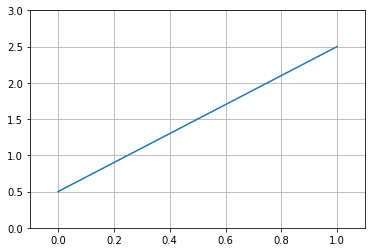

In [2]:
x = np.linspace(0, 1, 20)
m = 2
c = 0.5
y = m * x + c
plt.plot(x, y)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

## Imagine that there is no line

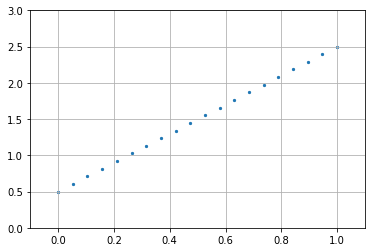

In [3]:
plt.scatter(x, y, s=5)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

In [4]:
print(x)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [5]:
print(y)

[0.5        0.60526316 0.71052632 0.81578947 0.92105263 1.02631579
 1.13157895 1.23684211 1.34210526 1.44736842 1.55263158 1.65789474
 1.76315789 1.86842105 1.97368421 2.07894737 2.18421053 2.28947368
 2.39473684 2.5       ]


## Ordinary Least Squares

Recall that,

$$\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}$$

and

$$\mathbf{\hat{\beta}} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$$

In [6]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [7]:
print(x)

[[0.        ]
 [0.05263158]
 [0.10526316]
 [0.15789474]
 [0.21052632]
 [0.26315789]
 [0.31578947]
 [0.36842105]
 [0.42105263]
 [0.47368421]
 [0.52631579]
 [0.57894737]
 [0.63157895]
 [0.68421053]
 [0.73684211]
 [0.78947368]
 [0.84210526]
 [0.89473684]
 [0.94736842]
 [1.        ]]


In [8]:
print(y)

[[0.5       ]
 [0.60526316]
 [0.71052632]
 [0.81578947]
 [0.92105263]
 [1.02631579]
 [1.13157895]
 [1.23684211]
 [1.34210526]
 [1.44736842]
 [1.55263158]
 [1.65789474]
 [1.76315789]
 [1.86842105]
 [1.97368421]
 [2.07894737]
 [2.18421053]
 [2.28947368]
 [2.39473684]
 [2.5       ]]


Suppose,

$$a = (\mathbf{X}^{T}\mathbf{X})^{-1}$$
and
$$b = \mathbf{X}^{T}\mathbf{y}$$

Therefore,

$$\mathbf{\hat{\beta}} = ab$$

In [9]:
a = np.linalg.inv(np.dot(x.T, x))
b = np.dot(x.T, y)
beta_hat = np.dot(a, b)

In [10]:
beta_hat

array([[2.73076923]])

$$\mathbf{\hat{y}} = \mathbf{X}\mathbf{\hat{\beta}}$$

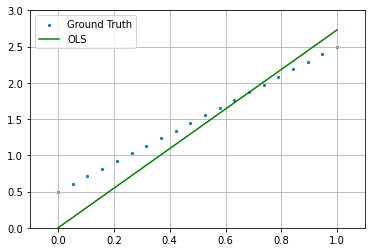

In [11]:
y_hat = np.dot(x, beta_hat)
plt.scatter(x, y, s=5, label='Ground Truth')
plt.plot(x, y_hat, 'g', label='OLS')
plt.legend()
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

# Question: What went wrong?

## Estimating the intercept / error

In [12]:
x = np.c_[x, np.ones(x.shape)]

In [13]:
a = np.linalg.inv(np.dot(x.T, x))
b = np.dot(x.T, y)
beta_hat = np.dot(a, b)

In [14]:
beta_hat

array([[2. ],
       [0.5]])

In [15]:
m_hat, c_hat = beta_hat.ravel()
y_hat = x[:, 0] * m_hat + c_hat

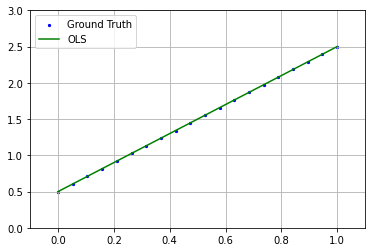

In [16]:
plt.scatter(x[:, 0], y, c='b', s=5, label='Ground Truth')
plt.plot(x[:, 0], y_hat, 'g', label='OLS')
plt.legend()
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

# Exercise: Make some noise.
#### Step 1: Pick a random slope ($m$) in the interval $[0.5, 2]$
#### Step 2: Pick a random intercept ($c$) in the interval $[0, 1]$
#### Step 3: Create $y = mx + c$ and add some noise to it, with [`np.random.rand`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html)
#### Step 4: Find $m$ and $c$, verify your solution

In [17]:
# enter code here
m = 3.14
c = 0.123

In [18]:
x = np.linspace(0, 1, 20)

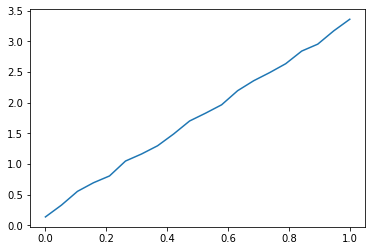

In [19]:
# enter code here
y = m*x + c
y += np.random.rand(20) * 0.1

plt.plot(x, y)

In [20]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

x = np.c_[x, np.ones([len(x), 1])]

In [21]:
a = np.linalg.inv(np.dot(x.T, x))
b= np.dot(x.T, y)
beta_hat = np.dot(a, b)

In [22]:
# enter code here
m_hat, c_hat = beta_hat.ravel()
print(m_hat, c_hat)

3.162013083110052 0.16961710441556216


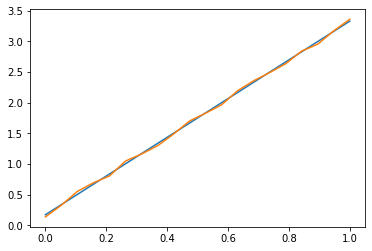

In [23]:
y_hat = x[:, 0] * m_hat + c_hat

plt.plot(x[:, 0], y_hat)
plt.plot(x[:, 0], y[:, 0])